[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/flavioluizseixas/aprendizado-de-maquina-na-saude/blob/main/1-Exerc%C3%ADcio/ExemploPython.ipynb)

# Exemplo

## Análise de Dados de Saúde com Modelos Descritivos e Explicativos

**Objetivo:** O objetivo deste projeto é realizar uma análise exploratória e descritiva de um conjunto de dados relacionados à saúde, utilizando a linguagem R. As tarefas são: identificar padrões, tendências e possíveis associações entre as variáveis do dataset, aplicando modelos descritivos e explicativos.

**Descrição:** Você deve selecionar um conjunto de dados de saúde, como por exemplo, um dataset contendo informações de pacientes com doenças crônicas, como diabetes, hipertensão, ou doenças cardíacas. A análise deverá incluir:

1. **Leitura e Pré-processamento do Dataset:** Carregue o dataset em R, explore suas características básicas e realize o pré-processamento necessário (tratar valores ausentes, normalizar variáveis, etc.).

2. **Análise Descritiva:** Use estatísticas descritivas para entender a distribuição das variáveis do dataset, incluindo medidas de tendência central (média, mediana) e de dispersão (desvio padrão, quartis).
Visualização dos Dados: Crie gráficos para visualizar a distribuição dos dados e identificar padrões, como histogramas, boxplots e gráficos de dispersão.

3. **Modelos Explicativos:** Aplique modelos explicativos (como regressão linear, logística ou árvores de decisão) para entender a relação entre as variáveis do dataset. Por exemplo, você pode investigar se a idade e o IMC estão associados ao risco de diabetes.

4. **Verificação de Associações:** Realize testes estatísticos para verificar a existência de associações significativas entre variáveis, como o teste qui-quadrado para variáveis categóricas ou a correlação de Pearson para variáveis numéricas.

5. **Interpretação dos Resultados:** Interprete os resultados obtidos a partir das análises e modelos aplicados, discutindo a significância e as implicações das descobertas.

## Exemplo

## 1- Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats

## 2- Dataset

Exemplo: Pima Indians Diabetes dataset, obtido pelo [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Pode ser substituído por outro dataset relacionado à saúde.

## Leitura e pré-processamento do dataset

In [3]:
# Carregar o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['num_preg', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'diabetes']
data = pd.read_csv(url, header=None, names=column_names)

# Exibir as primeiras linhas do dataset
print(data.head())

   num_preg  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0         6      148              72              35        0  33.6   
1         1       85              66              29        0  26.6   
2         8      183              64               0        0  23.3   
3         1       89              66              23       94  28.1   
4         0      137              40              35      168  43.1   

   diabetes_pedigree  age  diabetes  
0              0.627   50         1  
1              0.351   31         0  
2              0.672   32         1  
3              0.167   21         0  
4              2.288   33         1  


## 3- Limpeza dos Dados

In [4]:
# Substituir valores zero por NaN para as colunas selecionadas
cols_with_zeros = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

## 4- Análise descritiva

         num_preg     glucose  blood_pressure  skin_thickness     insulin  \
count  768.000000  763.000000      733.000000      541.000000  394.000000   
mean     3.845052  121.686763       72.405184       29.153420  155.548223   
std      3.369578   30.535641       12.382158       10.476982  118.775855   
min      0.000000   44.000000       24.000000        7.000000   14.000000   
25%      1.000000   99.000000       64.000000       22.000000   76.250000   
50%      3.000000  117.000000       72.000000       29.000000  125.000000   
75%      6.000000  141.000000       80.000000       36.000000  190.000000   
max     17.000000  199.000000      122.000000       99.000000  846.000000   

              bmi  diabetes_pedigree         age    diabetes  
count  757.000000         768.000000  768.000000  768.000000  
mean    32.457464           0.471876   33.240885    0.348958  
std      6.924988           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.000000    0.

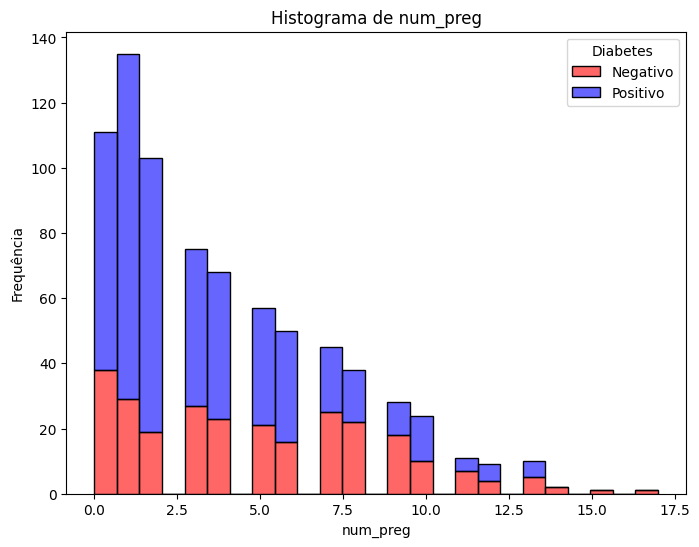

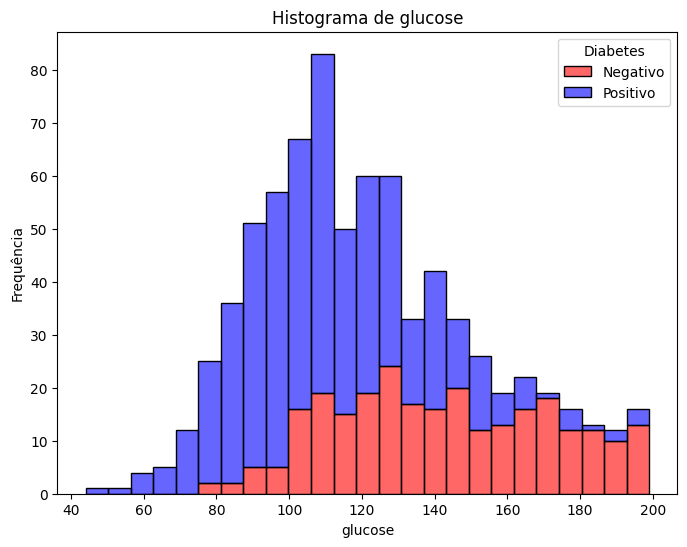

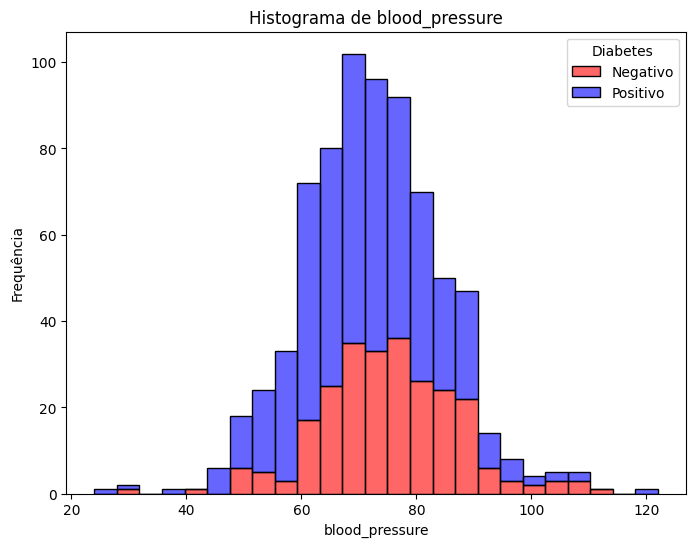

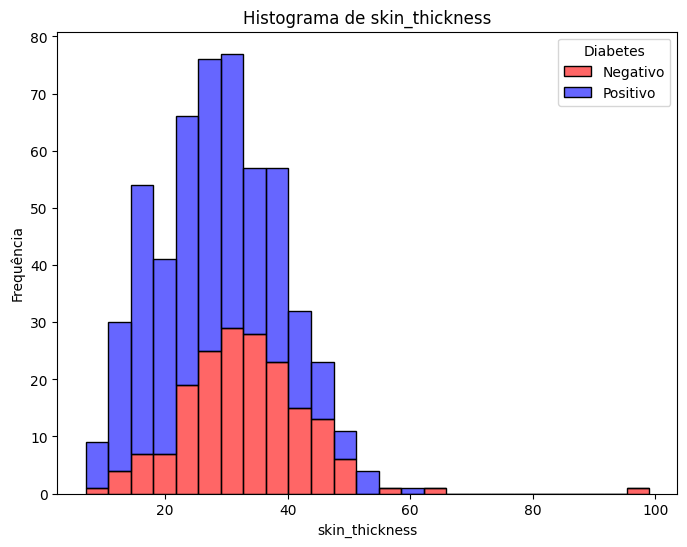

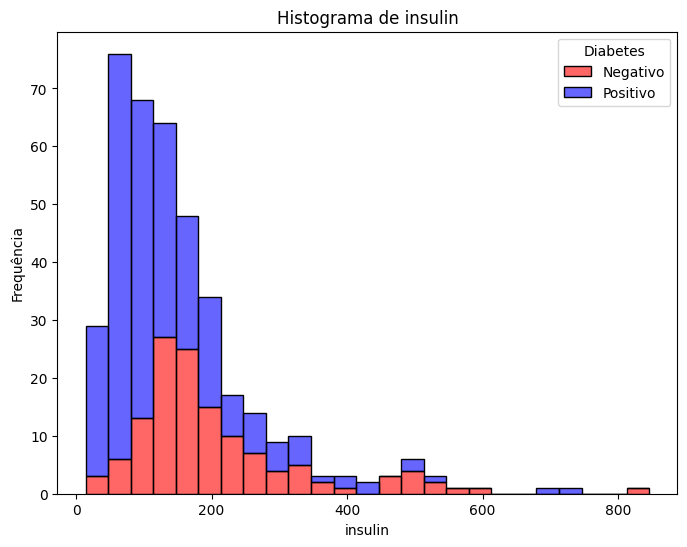

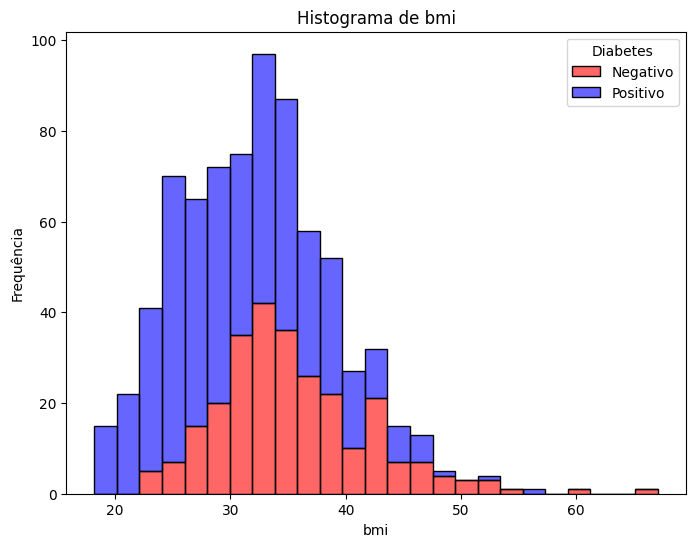

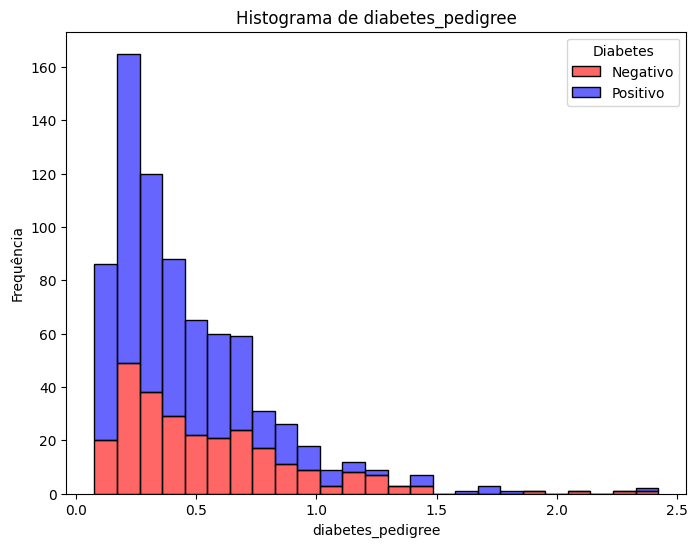

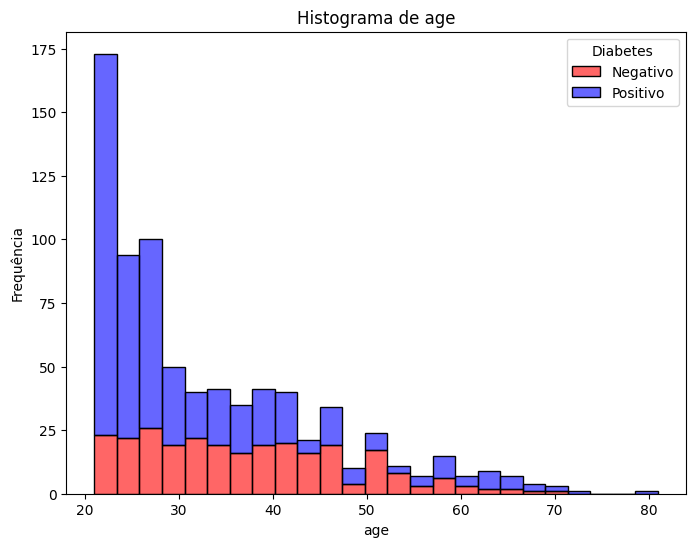

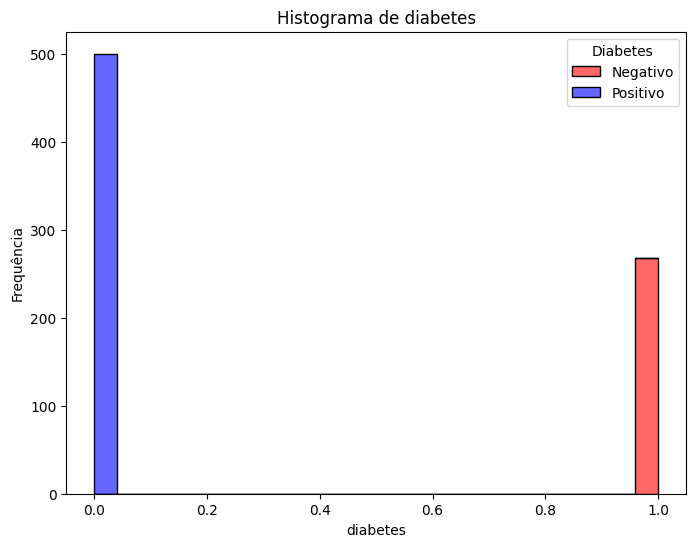

In [5]:
# Resumo das estatísticas descritivas
print(data.describe())

# Iterar sobre as colunas de interesse
for column in data.columns:
    # Verificar se a coluna é do tipo numérico
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))
        
        # Criar o histograma
        sns.histplot(data=data, x=column, hue='diabetes', multiple='stack', bins=25, palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='black')
        
        # Adicionar título e rótulos
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.legend(title='Diabetes', labels=['Negativo', 'Positivo'])
        
        # Mostrar o gráfico
        plt.show()

## 6- Gráfico de Dispersão

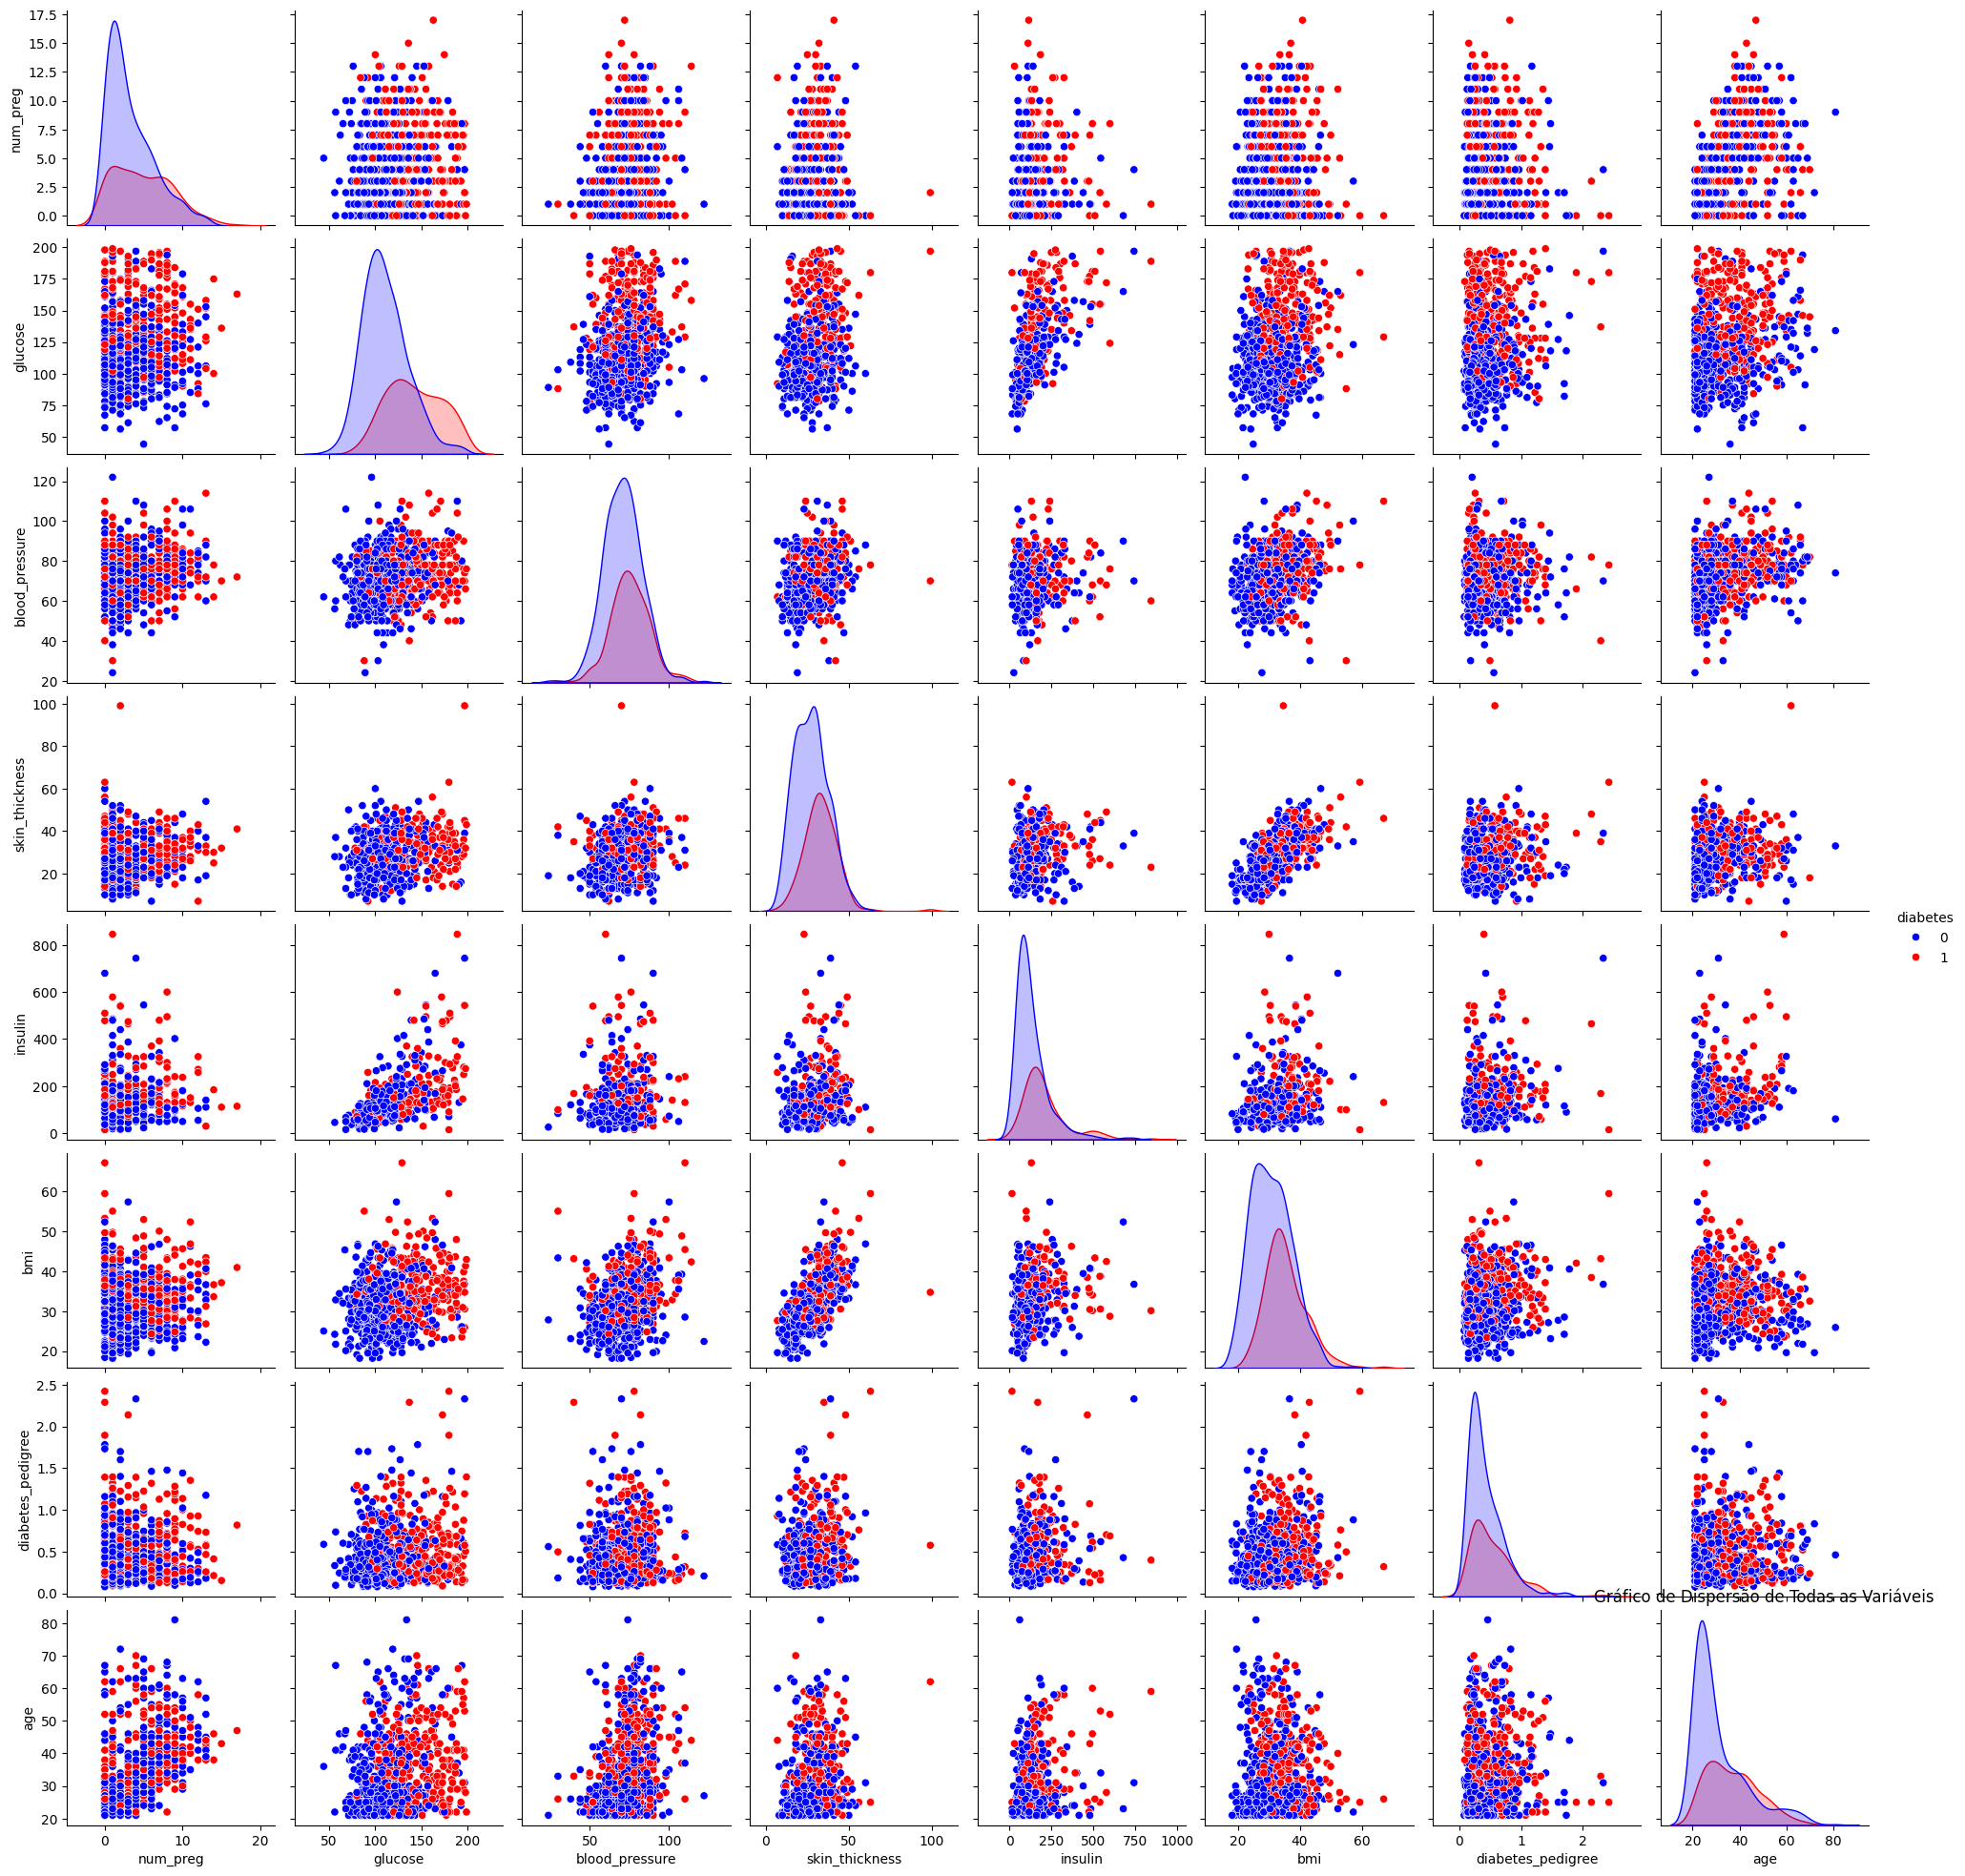

In [6]:
# Gráfico de dispersão de todas as variáveis
sns.pairplot(data, hue='diabetes', palette={0: 'blue', 1: 'red'})
plt.title('Gráfico de Dispersão de Todas as Variáveis')
plt.show()

## 7- Modelo explicativo (regressão logística)

In [7]:
# Preparar os dados para o modelo
X = data[['glucose', 'bmi', 'age']].dropna()
y = data.loc[X.index, 'diabetes']

# Ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)

# Resumo dos coeficientes
coef = pd.DataFrame(model.coef_, columns=X.columns)
coef['Intercept'] = model.intercept_
print(coef)

# Odds Ratio
odds_ratios = np.exp(model.coef_[0])
print('Odds Ratios:')
for feature, ratio in zip(X.columns, odds_ratios):
    print(f'{feature}: {ratio:.4f}')

    glucose       bmi       age  Intercept
0  0.035548  0.089734  0.028696  -9.031609
Odds Ratios:
glucose: 1.0362
bmi: 1.0939
age: 1.0291


## 8- Teste de correlação

In [8]:
# Supondo que 'data' é um DataFrame do pandas
# Remover linhas com NaNs nas colunas de interesse
cleaned_data = data[['glucose', 'age']].dropna()

# Calcular a correlação de Pearson
correlation, p_value = stats.pearsonr(cleaned_data['glucose'], cleaned_data['age'])
print(f'Coeficiente de Correlação: {correlation:.4f}, p-valor: {p_value:.4f}')

Coeficiente de Correlação: 0.2671, p-valor: 0.0000


## 9- Teste de Associação entre Glicose e Presença de Diabetes usando Chi-quadrado

In [17]:
# Criar uma tabela de contingência
glucose_bins = pd.cut(data['glucose'].fillna(0), bins=[0, 120, data['glucose'].max()])
contingency_table = pd.crosstab(glucose_bins, data['diabetes'])

# Teste de Chi-quadrado
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)
print(f'Chi-quadrado: {chi2_stat:.4f}, p-valor: {p_val:.4f}')

Chi-quadrado: 123.3485, p-valor: 0.0000
